In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(123)

# Define the mean function of the Gaussian process
def mean_func(x):
    return np.zeros_like(x)

# Define the covariance function of the Gaussian process
def cov_func(x1, x2):
    return np.exp(-0.5*(x1.reshape(-1,1) - x2.reshape(1,-1))**2)

# Generate the x values
x = np.linspace(0, 52, 100)

# Calculate the mean and covariance matrices
mean = mean_func(x)
cov = cov_func(x.reshape(-1, 1), x.reshape(-1, 1))

# Generate samples from the Gaussian process
samples = np.random.multivariate_normal(mean, cov, size=5)


<Axes: >

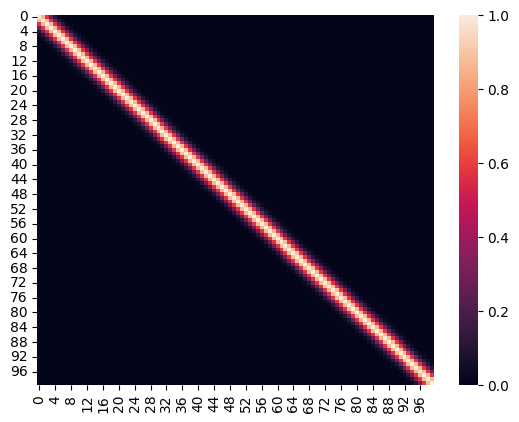

In [39]:
import seaborn as sns
sns.heatmap(cov)

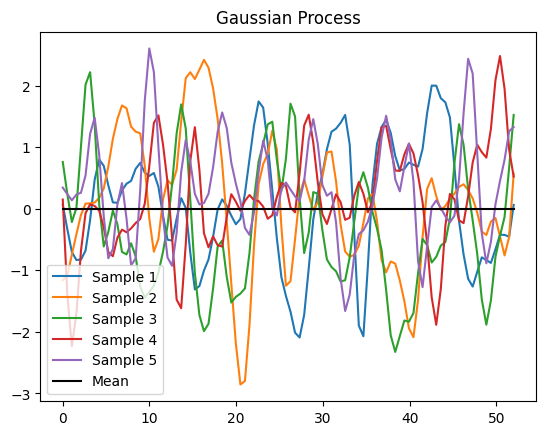

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(123)

# Define the mean function of the Gaussian process
def mean_func(x):
    return np.zeros_like(x)

# Define the covariance function of the Gaussian process
def cov_func(x1, x2):
    return np.exp(-0.5*(x1.reshape(-1,1) - x2.reshape(1,-1))**2)

# Generate the x values
x = np.linspace(0, 52, 100)

# Calculate the mean and covariance matrices
mean = mean_func(x)
cov = cov_func(x.reshape(-1, 1), x.reshape(-1, 1))

# Generate samples from the Gaussian process
samples = np.random.multivariate_normal(mean, cov, size=5)


# Plot the samples
for i in range(5):
    plt.plot(x, samples[i], label=f'Sample {i+1}')

# Plot the mean functionµ

plt.plot(x, mean, color='black', label='Mean')

# Set the title and legend
plt.title('Gaussian Process')
plt.legend()

# Show the plot
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the true function we want to approximate
f = lambda x: np.sin(3 * x)

# Define the training data
X_train = np.array([-0.9, -0.7, -0.4, -0.2, 0.1, 0.4, 0.6, 0.8]).reshape(-1, 1)
X_train = np.array([-0.7, -0.1,  0.4 ]).reshape(-1, 1)
y_train = f(X_train)

# Define the test data (for plotting)
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)

# Define the kernel for the Gaussian process
kernel = 1* RBF(length_scale=0.3)

# Initialize the Gaussian process regressor and fit it to the training data
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, optimizer = None, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# Generate 15 samples from the posterior distribution
n_samples = 150
y_samples = gp.sample_y(X_test, n_samples)


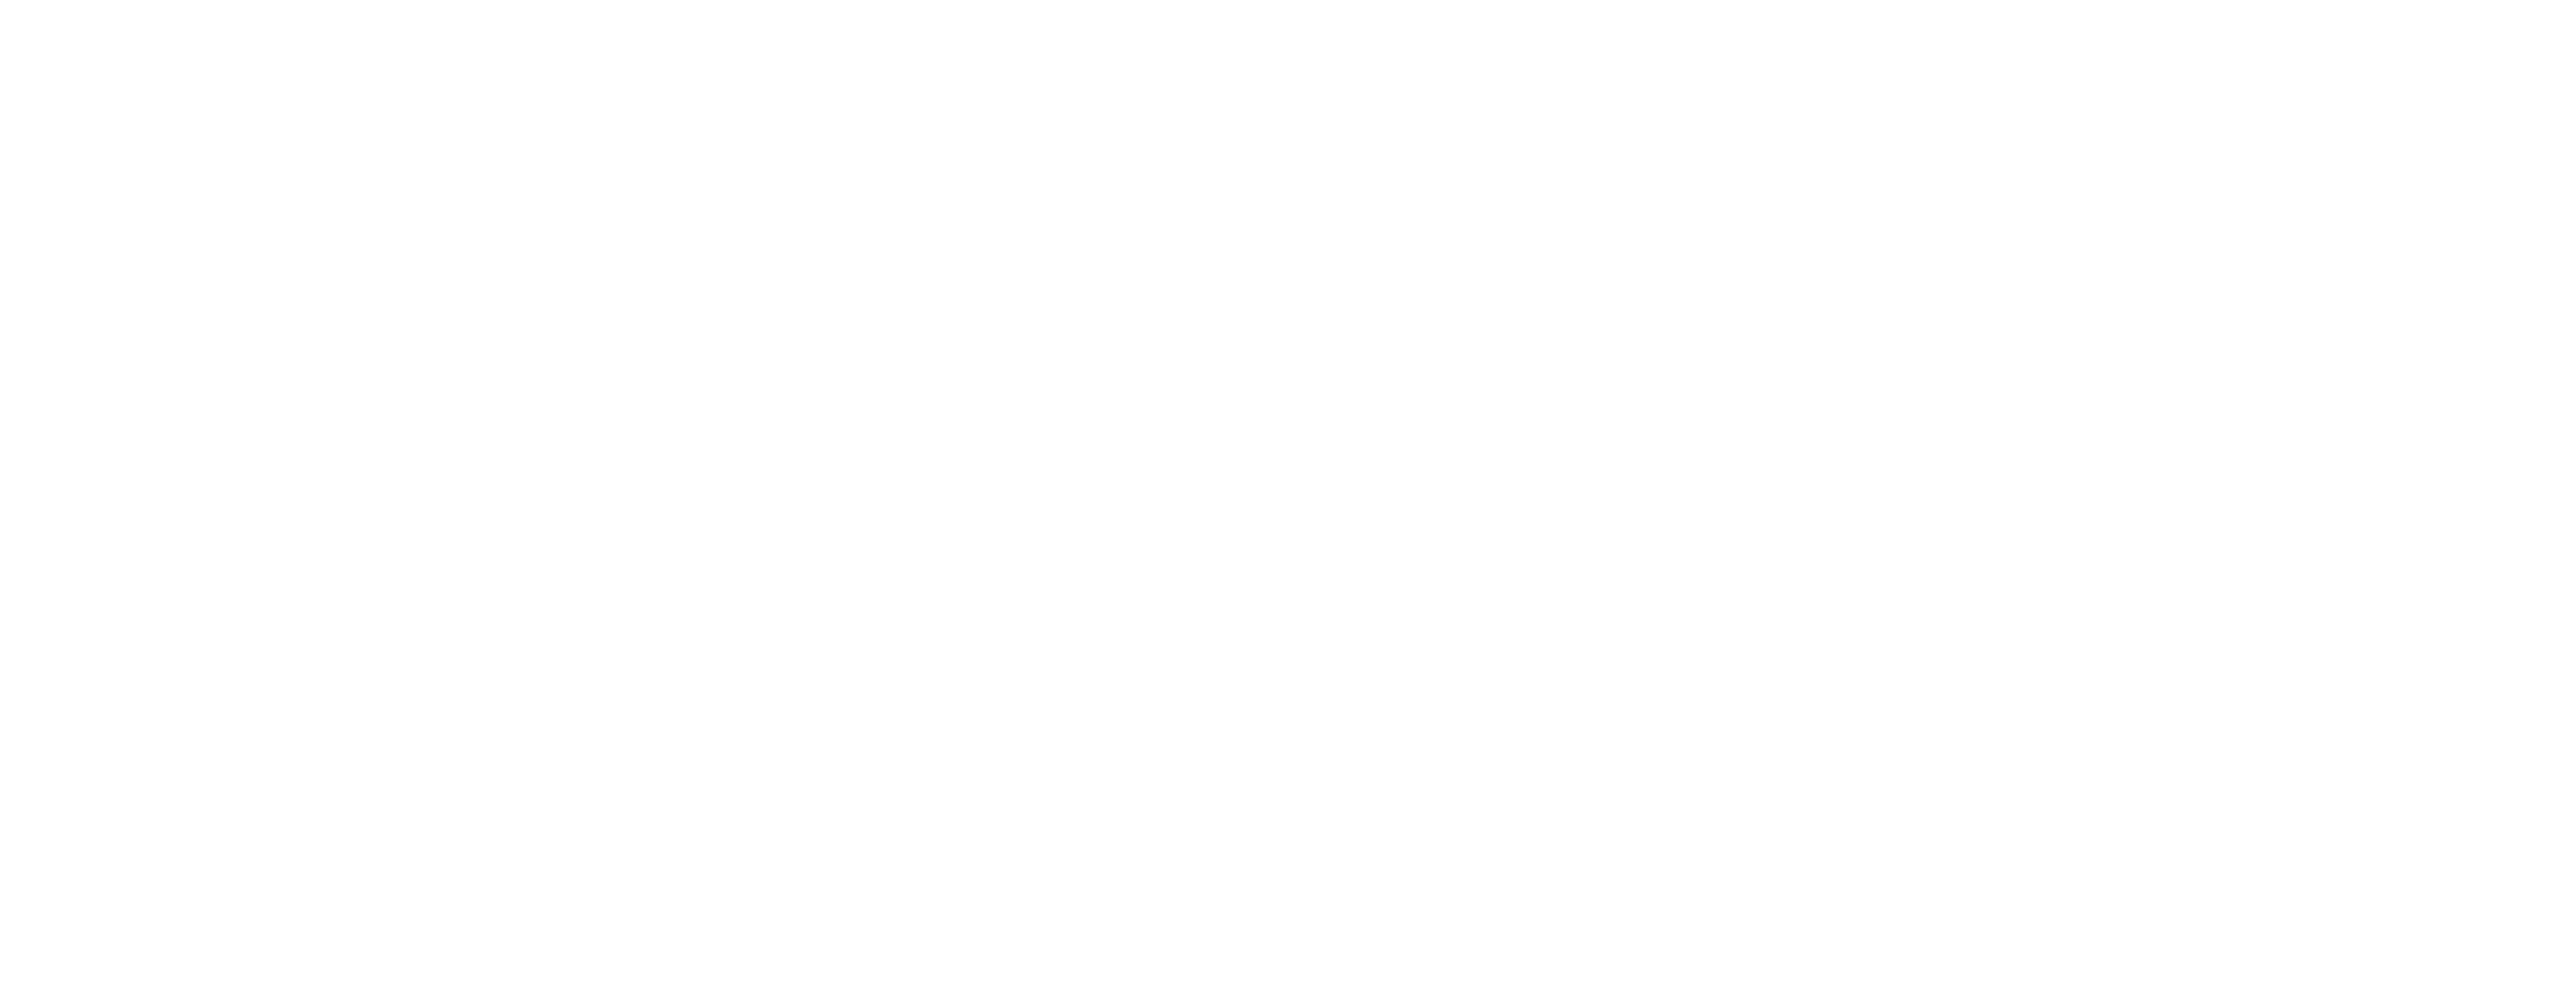

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi = 400)
# Set up the plot
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14

for i in range(n_samples):
    plt.plot(X_test, y_samples[:, i], color='white', alpha=0.1)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
plt.rcParams['figure.facecolor'] = '#2C3347'
#ax.set_facecolor((44/255, 51/255, 71/255))
fig.tight_layout()
plt.savefig('GP.png')
plt.show()